In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [10]:
file_name = 'Real_Estate_Sales_2001-2023_GL.csv'
gdf = gpd.read_file(file_name)

In [11]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Serial Number     1141722 non-null  object
 1   List Year         1141722 non-null  object
 2   Date Recorded     1141722 non-null  object
 3   Town              1141722 non-null  object
 4   Address           1141722 non-null  object
 5   Assessed Value    1141722 non-null  object
 6   Sale Amount       1141722 non-null  object
 7   Sales Ratio       1141722 non-null  object
 8   Property Type     1141722 non-null  object
 9   Residential Type  1141722 non-null  object
 10  Non Use Code      1141722 non-null  object
 11  Assessor Remarks  1141722 non-null  object
 12  OPM remarks       1141722 non-null  object
 13  Location          1141722 non-null  object
dtypes: object(14)
memory usage: 121.9+ MB


In [12]:
gdf.head(5)

Serial Number List Year Date Recorded     Town          Address  \
0       2020177      2020    04/14/2021  Ansonia    323 BEAVER ST   
1       2020225      2020    05/26/2021  Ansonia   152 JACKSON ST   
2       2020348      2020    09/13/2021  Ansonia  230 WAKELEE AVE   
3       2020090      2020    12/14/2020  Ansonia      57 PLATT ST   
4        210288      2021    06/20/2022     Avon   12 BYRON DRIVE   

  Assessed Value Sale Amount Sales Ratio Property Type Residential Type  \
0      133000.00   248400.00      0.5354   Residential    Single Family   
1      110500.00   239900.00      0.4606   Residential     Three Family   
2      150500.00   325000.00       0.463    Commercial                    
3      127400.00   202500.00      0.6291   Residential       Two Family   
4      179990.00   362500.00      0.4965   Residential            Condo   

  Non Use Code Assessor Remarks OPM remarks  \
0                                             
1                                             
2                                             
3                                             
4                                             

                             Location  
0          POINT (-73.06822 41.35014)  
1                                      
2                                      
3                                      
4  POINT (-72.879115982 41.773452988)

In [35]:
value_counts = gdf['List Year'].value_counts().sort_index(ascending=False)
value_counts

List Year
2023    44093
2022    43470
2021    56946
2020    66592
2019    58954
2018    50709
2017    45691
2016    49773
2015    46651
2014    49563
2013    39943
2012    35973
2011    31065
2010    33491
2009    42508
2008    32735
2007    35617
2006    48785
2005    61602
2004    84056
2003    64239
2002    59682
2001    59584
Name: count, dtype: int64

In [38]:
gdf[['List Year', 'Location']]

List Year                            Location
0            2020          POINT (-73.06822 41.35014)
1            2020                                    
2            2020                                    
3            2020                                    
4            2021  POINT (-72.879115982 41.773452988)
...           ...                                 ...
1141717      2023          POINT (-72.86373 41.56032)
1141718      2023          POINT (-72.97401 41.24665)
1141719      2023          POINT (-72.88193 41.62094)
1141720      2023          POINT (-72.30557 41.29054)
1141721      2023          POINT (-73.13448 41.29345)

[1141722 rows x 2 columns]

In [74]:
gdf_clean = gdf

In [75]:
gdf_clean['Location'] = gdf_clean['Location'].replace(['null', 'None', '', 'N/A'], pd.NA)
gdf_clean = gdf_clean.dropna(subset=['Location'])

In [76]:
gdf_clean

Serial Number  List Year Date Recorded         Town  \
0             2020177       2020    04/14/2021      Ansonia   
4              210288       2021    06/20/2022         Avon   
6              200121       2020    12/15/2020         Avon   
24             211386       2021    04/18/2022   Bridgeport   
29             200207       2020    11/23/2020      Bristol   
...               ...        ...           ...          ...   
1141717        230299       2023    04/19/2024  Southington   
1141718        230568       2023    05/15/2024   West Haven   
1141719        230217       2023    02/20/2024  Southington   
1141720        230097       2023    05/30/2024     Old Lyme   
1141721        230383       2023    06/06/2024      Shelton   

                                Address Assessed Value Sale Amount  \
0                         323 BEAVER ST      133000.00   248400.00   
4                        12 BYRON DRIVE      179990.00   362500.00   
6                          63 NORTHGATE      528490.00   775000.00   
24                         55 CANNON ST      110610.00    50000.00   
29       BROAD PLACE LOTS 225-6 AND 224        8400.00    38500.00   
...                                 ...            ...         ...   
1141717   580-23 MERIDEN WATERBURY TPKE       26540.00   509900.00   
1141718                  165 MILTON AVE      148050.00   400300.00   
1141719                     242 LAZY LN      177340.00   334750.00   
1141720                21 BUTTONBALL RD        8030.00    35000.00   
1141721                512 ANTELOPE TRL      306460.00   659813.00   

        Sales Ratio Property Type Residential Type             Non Use Code  \
0            0.5354   Residential    Single Family                            
4            0.4965   Residential            Condo                            
6            0.6819   Residential    Single Family                            
24           2.2122   Vacant Land                                             
29           0.2181   Vacant Land                                25 - Other   
...             ...           ...              ...                      ...   
1141717      0.0520   Residential            Condo  07 - Change in Property   
1141718      0.3698   Residential    Single Family                            
1141719      0.5297   Residential    Single Family                            
1141720      0.2294   Vacant Land                                             
1141721      0.4645   Residential            Condo               25 - Other   

                       Assessor Remarks                       OPM remarks  \
0                                                                           
4                                                                           
6                                                                           
24                                                                          
29                    MULTIPLE LOT SALE                                     
...                                 ...                               ...   
1141717  NEW CONSTRUCTION OVER 55 CONDO                                     
1141718                                                                     
1141719                                                                     
1141720    DEVELOPERS LOT FOR NEW CONST                                     
1141721                       89 33 512  PER MLS CLOSING PRICE = $675,000   

                                   Location  
0                POINT (-73.06822 41.35014)  
4        POINT (-72.879115982 41.773452988)  
6                POINT (-72.89675 41.79445)  
24        POINT (-73.19020596 41.178257983)  
29               POINT (-72.90406 41.66996)  
...                                     ...  
1141717          POINT (-72.86373 41.56032)  
1141718          POINT (-72.97401 41.24665)  
1141719          POINT (-72.88193 41.62094)  
1141720          POINT (-72.30557 41.29054)  
1141721          POINT (-73.13

In [77]:
plt.rcParams['figure.dpi']=150

In [78]:
numeric_cols = []
for col in gdf_clean.columns:
    try:
        gdf_clean[col] = pd.to_numeric(gdf[col])
        if gdf_clean[col].dtype in ['float64', 'int64', 'Int64']:
            numeric_cols.append(col)
    except:
        pass

/tmp/ipython-input-467/3247089485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_clean[col] = pd.to_numeric(gdf[col])


In [79]:
numeric_cols

['Serial Number', 'List Year', 'Assessed Value', 'Sale Amount']

In [80]:
gdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341241 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     341241 non-null  int64  
 1   List Year         341241 non-null  int64  
 2   Date Recorded     341241 non-null  object 
 3   Town              341241 non-null  object 
 4   Address           341241 non-null  object 
 5   Assessed Value    341241 non-null  float64
 6   Sale Amount       341241 non-null  float64
 7   Sales Ratio       341241 non-null  object 
 8   Property Type     341241 non-null  object 
 9   Residential Type  341241 non-null  object 
 10  Non Use Code      341241 non-null  object 
 11  Assessor Remarks  341241 non-null  object 
 12  OPM remarks       341241 non-null  object 
 13  Location          341241 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 39.1+ MB


In [89]:
gdf_clean['Date Recorded'] = pd.to_datetime(gdf_clean['Date Recorded'],format='%m/%d/%Y', errors='coerce')

/tmp/ipython-input-467/758752936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_clean['Date Recorded'] = pd.to_datetime(gdf_clean['Date Recorded'],format='%m/%d/%Y', errors='coerce')


In [93]:
gdf_clean.loc[6231]

Serial Number                           200630
List Year                                 2020
Date Recorded              2021-03-22 00:00:00
Town                                Manchester
Address                       52 FALKNOR DRIVE
Assessed Value                        105800.0
Sale Amount                           237000.0
Sales Ratio                             0.4464
Property Type                      Residential
Residential Type                 Single Family
Non Use Code                                  
Assessor Remarks                              
OPM remarks                                   
Location            POINT (-72.55395 41.77557)
Name: 6231, dtype: object

<Axes: >

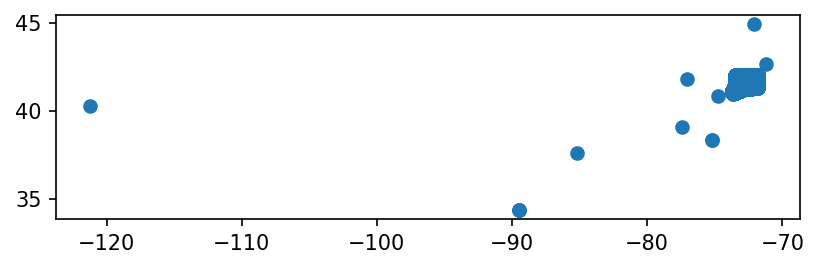

In [104]:
from shapely import wkt
from shapely.geometry import Point
import datetime as dt

# Step 1: Robustly filter Date Recorded to ensure it's within Matplotlib's accepted range
start_date = dt.datetime(1, 1, 1)
end_date = dt.datetime(9999, 12, 31)

gdf_clean_filtered_dates = gdf_clean[
    (gdf_clean['Date Recorded'] >= start_date)
    & (gdf_clean['Date Recorded'] <= end_date)
].copy()

# Step 2: Convert 'Location' strings to shapely Point objects and set geometry
# Only apply to non-null Location values that are strings
gdf_clean_filtered_dates['geometry'] = gdf_clean_filtered_dates['Location'].apply(lambda x: wkt.loads(x) if pd.notna(x) and isinstance(x, str) else None)

# Drop rows where geometry could not be parsed or was null
gdf_clean_filtered_dates = gdf_clean_filtered_dates.dropna(subset=['geometry'])

# Explicitly ensure it's a GeoDataFrame with the correct geometry column and CRS.
# Assuming WGS84 (EPSG:4326) for latitude and longitude coordinates.
gdf_clean_filtered_dates = gpd.GeoDataFrame(gdf_clean_filtered_dates, geometry='geometry', crs="EPSG:4326")

# Step 3: Plot the geometries
gdf_clean_filtered_dates.plot(figsize=(10, 10))

In [106]:
gdf_clean_filtered_dates.total_bounds

array([-121.23091,   34.34581,  -71.18755,   44.93459])

In [107]:
aoi = ([-79,40,-71, 45])

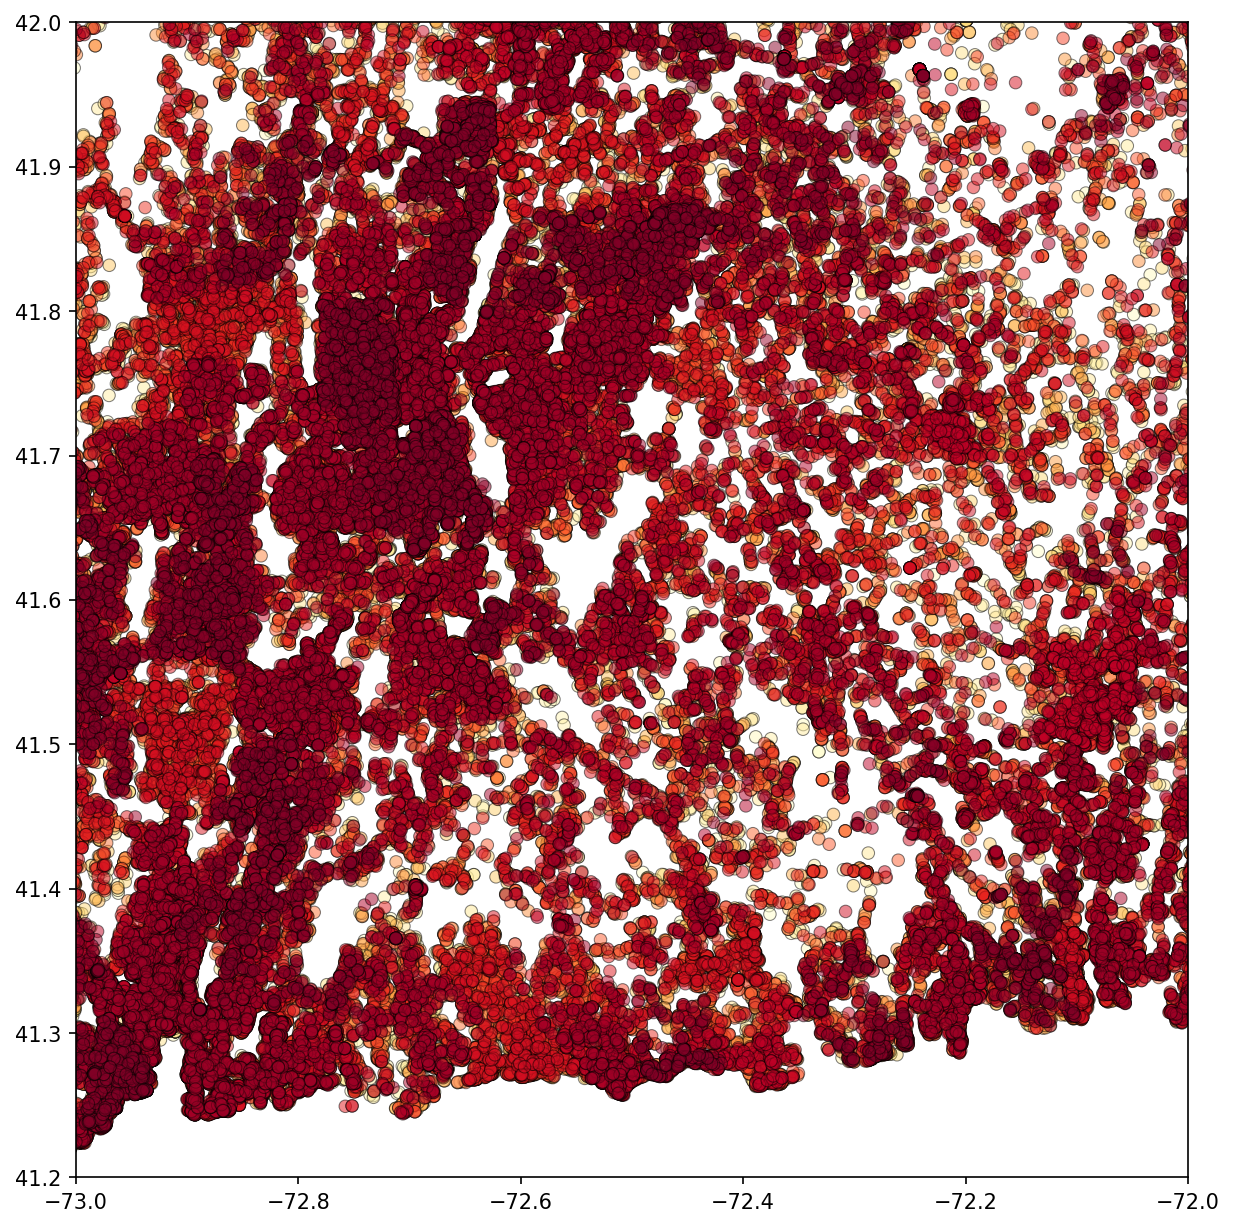

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([-73, -72]) # Adjusted x-axis to cover the longitude range of your data
ax.set_ylim([41.2, 42]) # Adjusted y-axis to cover the latitude range of your data
gdf_clean_filtered_dates.plot(ax=ax, cmap='YlOrRd', alpha=0.5, edgecolor='black', linewidth=0.5)
plt.show()

In [130]:
gdf_2023 = gdf_clean_filtered_dates[gdf_clean_filtered_dates['Date Recorded'].dt.year == 2023]
gdf_single_2023 = gdf_2023[gdf_2023['Residential Type'] == 'Single Family']
gdf_single_2023

Serial Number  List Year Date Recorded          Town  \
1054162         220060       2022    2023-01-03  East Windsor   
1054166        2200166       2022    2023-01-27   New Milford   
1054168          22211       2022    2023-04-28     Montville   
1054172        2222100       2022    2023-02-21       Ansonia   
1054173         220249       2022    2023-01-17     Greenwich   
...                ...        ...           ...           ...   
1141700        2300031       2023    2023-11-08      Plymouth   
1141701         230030       2023    2023-10-20      Trumbull   
1141710        2300019       2023    2023-11-14       Redding   
1141711         230045       2023    2023-11-28      Trumbull   
1141714          23066       2023    2023-11-21       Newtown   

                     Address  Assessed Value  Sale Amount Sales Ratio  \
1054162           108 RYE ST        108620.0     200000.0      0.5431   
1054166      28 BIRCHWOOD DR        168140.0     400000.0      0.4204   
1054168          41 CAROL DR        206410.0     355000.0      0.5814   
1054172       124 TREMONT ST        120960.0     105000.0      1.1520   
1054173   110 SHEEPHILL ROAD        509600.0     700000.0      0.7280   
...                      ...             ...          ...         ...   
1141700            7 HIGH ST        149660.0     309000.0      0.4843   
1141701        31 WILSON AVE        229530.0     435000.0      0.5276   
1141710     101 PEACEABLE ST        404600.0     730000.0      0.5542   
1141711      60 PARTRIDGE LN        346080.0     705000.0      0.4908   
1141714  6 BLACK CHERRY LANE        291810.0     375000.0      0.7781   

        Property Type Residential Type                  Non Use Code  \
1054162   Residential    Single Family                   01 - Family   
1054166   Residential    Single Family                                 
1054168   Residential    Single Family                                 
1054172   Residential    Single Family  26 - Rehabilitation Deferred   
1054173   Residential    Single Family                                 
...               ...              ...                           ...   
1141700   Residential    Single Family                                 
1141701   Residential    Single Family                                 
1141710   Residential    Single Family                                 
1141711   Residential    Single Family       07 - Change in Property   
1141714   Residential    Single Family                                 

                          Assessor Remarks OPM remarks  \
1054162                                                  
1054166                        SALES RATIO               
1054168                                                  
1054172  SOLD OUT OF FCL WITHOUT REPAIRING               
1054173                                                  
...                                    ...         ...   
1141700                                                  
1141701                                                  
1141710                                                  
1141711                 IMPROVED CONDITION               
1141714                                                  

                                   Location                    geometry  
1054162  POINT (-72.556613038 41.900422979)  POINT (-72.55661 41.90042)  
1054166   POINT (-73.412279037 41.59633298)  POINT (-73.41228 41.59633)  
1054168  POINT (-72.147517992 41.452868996)  POINT (-72.14752 41.45287)  
1054172  POINT (-73.074479035 41.342346017)  POINT (-73.07448 41.34235)  
1054173   POINT (-73.58336399 41.049459982)  POINT (-73.58336 41.04946)  
...                                     ...                         ...  
1141700          POINT (-73.01386 41.67996)  POINT (-73.01386 41.67996)  
1141701           POINT (-73.1884 41.22293)   POINT (-73.1884 41.22293)  
1141710           POINT (-73.4255 41.27485)   POINT (-73.4255 41.27485)  
1141711           POINT (-73.16685 41.2386)   POI

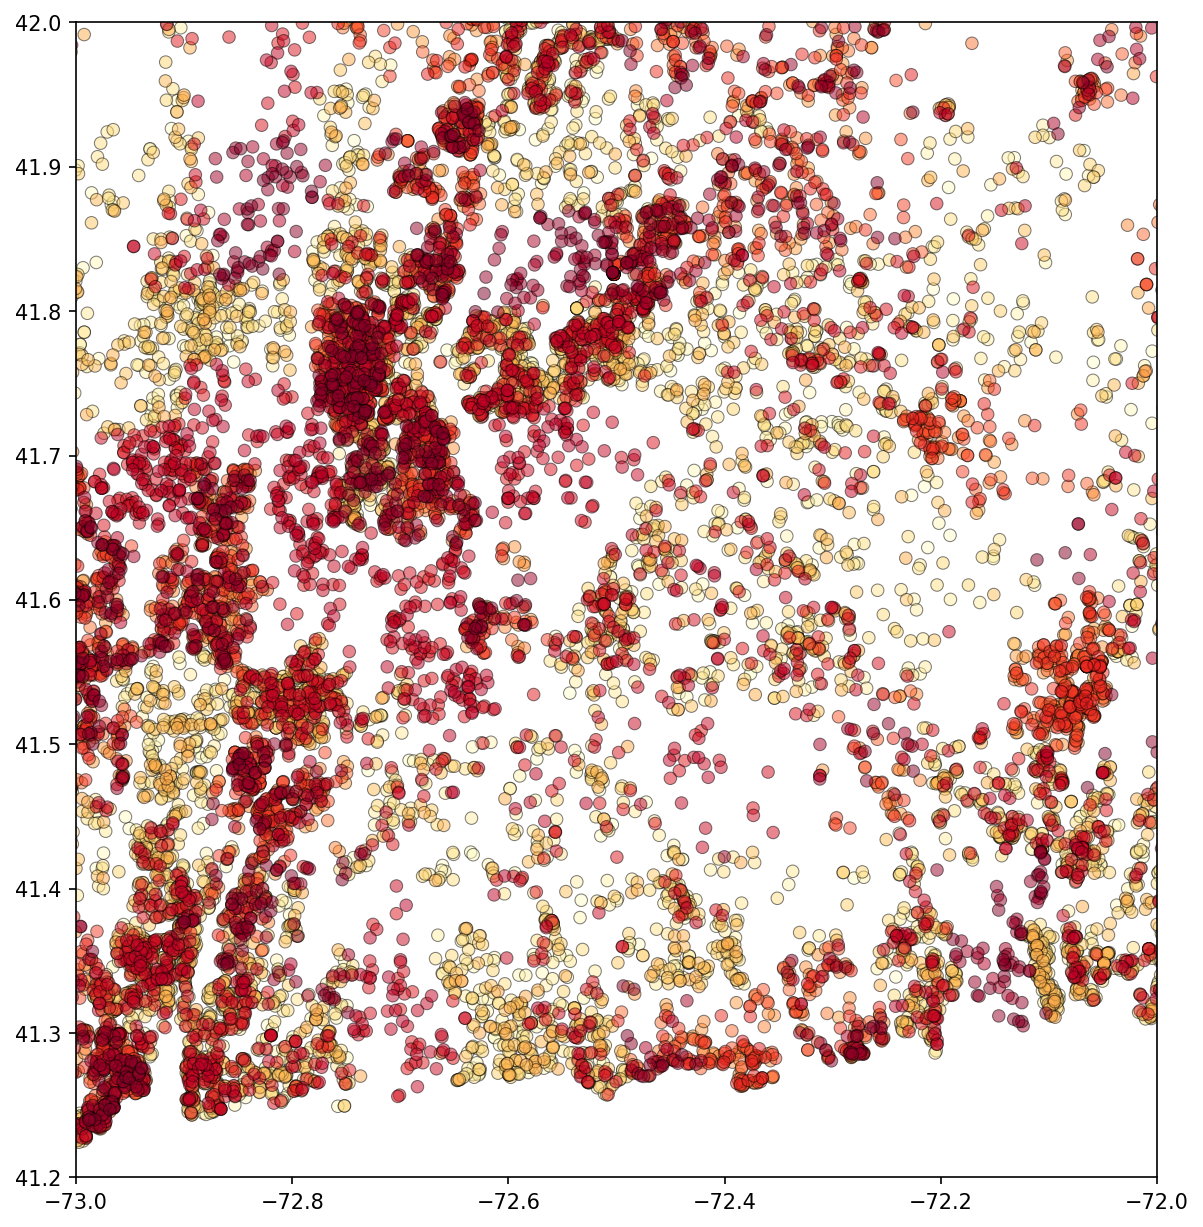

In [132]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([-73, -72]) # Adjusted x-axis to cover the longitude range of your data
ax.set_ylim([41.2, 42]) # Adjusted y-axis to cover the latitude range of your data
gdf_single_2023.plot(ax=ax, cmap='YlOrRd', alpha=0.5, edgecolor='black', linewidth=0.5)
plt.show()